In [120]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

# 1. 서울시 구별 CCTV 현황 분석

    - http://opengov.seoul.go.kr
    - http://stat.seoul.go.kr

In [4]:
# https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2734&srvType=F&serviceKind=1&currentPageNo=1
# 들어가서 
# file - down
# analysis폴더 - data폴더 안에 - seoul폴더 만들어서 여기에 저장시키기
# 쌤이 올려주신 'cctv.csv' 파일도 저장
# 쌤이 올려주신 'report.xls' 파일도 저장

## 1) 데이터 수집

In [6]:
# CCTV 자료 불러오기
cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [9]:
# 인구수 자료 불러오기
pop_seoul = pd.read_excel("data/seoul/Report.xls", header=2, usecols="B, D, G, J, N") 
           # header : 제목2개 버리기, 엑셀파일에서 사용가능 # usecols : 엑셀에서의 컬럼 입력해서 필요한 컬럼자료만 가져온다
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


# 2) 전처리

In [51]:
### 컬럼 이름을 변경

# CCTV자료에서 기관명이라는 컬럼명을 "구별"로 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0] : "구별"}, inplace=True)   # inplace : 원본 자체 바꿔주기
cctv_seoul.head()

# 인구수 데이터에서 컬럼명을 각각 구별, 인구수, 한국인, 외국인, 고령자로 변경
pop_seoul.rename(columns={pop_seoul.columns[0] : "구별", 
                          pop_seoul.columns[1] : "인구수",
                          pop_seoul.columns[2] : "한국인",
                          pop_seoul.columns[3] : "외국인",
                          pop_seoul.columns[4] : "고령자"}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


## 3) 탐색적 데이터 분석

In [46]:
# 어느 구가 CCTV가 가장 많이 설치 되었는가?
#---------------------------------------------

# CCTV데이터에서 소계를 기준으로 정렬
cctv_seoul.sort_values(by="소계", ascending=False).head(5)
cctv_seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,825,238,159,42,386,246.64
2,강북구,831,369,120,138,204,125.20
5,광진구,878,573,78,53,174,53.23
3,강서구,911,388,258,184,81,134.79
24,중랑구,916,509,121,177,109,79.96


In [47]:
# CCTV의 설치 증가율을 알아보자
#---------------------------------------------

# CCTV 설치 연도별 증가율을 구해서 "최근증가율" 컬럼을 새로 추가
cctv_seoul["최근증가율"]=((cctv_seoul["2014년"]+cctv_seoul["2015년"]+cctv_seoul["2016년"])/cctv_seoul["2013년도 이전"]*100).round(2)
cctv_seoul

cctv_seoul.sort_values(by="최근증가율", ascending=False).head(5)
cctv_seoul.sort_values(by="최근증가율", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2482,1843,142,30,467,34.67
13,서대문구,1254,844,50,68,292,48.58
20,용산구,2096,1368,218,112,398,53.22
5,광진구,878,573,78,53,174,53.23
14,서초구,2297,1406,157,336,398,63.37


In [52]:
# 인구수 데이터를 분석
# -----------------------------------------

# 인구수 데이터에서 필요없는 행 삭제(서울시 전체 합계 삭제) : del(컬럼 위주로 삭제), drop(행 기준. 행 위주로 삭제)
# pop_seoul.drop([0], inplace=True)
pop_seoul.head()


,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [58]:
# 구별 데이터의 중복이나 결측치등을 확인
pop_seoul["구별"].unique()

pop_seoul[pop_seoul["구별"].isnull()]  # nan값 위치 알기
# pop_seoul.drop([26], inplace=True)  # nan값 위치에 따라 삭제해주기
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [69]:
# 어느 구가 가장 인구수가 많은가?
pop_seoul.sort_values(by="인구수", ascending=False).head(5)
pop_seoul.sort_values(by="한국인", ascending=False).head(5)
pop_seoul.sort_values(by="외국인", ascending=False).head(5)
pop_seoul.sort_values(by="고령자", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자
24,송파구,671994,665282,6712,77978
16,강서구,608361,601696,6665,77381
12,은평구,490253,485902,4351,75535
11,노원구,555803,551902,3901,75081
21,관악구,522292,504445,17847,70807


In [70]:
# 외국인비율, 고령자비율 컬럼을 추가해서 순위 확인
pop_seoul["외국인비율"]=(pop_seoul["외국인"]/pop_seoul["인구수"]*100).round(2)
pop_seoul["고령자비율"]=(pop_seoul["고령자"]/pop_seoul["인구수"]*100).round(2)

In [74]:
pop_seoul.sort_values(by="외국인비율", ascending=False).head(5)
pop_seoul.sort_values(by="외국인비율", ascending=True).head(5)

pop_seoul.sort_values(by="고령자비율", ascending=False).head(5)
pop_seoul.sort_values(by="고령자비율", ascending=True).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671994,665282,6712,77978,1.00,11.60
23,강남구,557865,552976,4889,65859,0.88,11.81
15,양천구,473087,469221,3866,56070,0.82,11.85
5,광진구,371671,357149,14522,44470,3.91,11.96
22,서초구,445164,440954,4210,54055,0.95,12.14


In [79]:
# 인구 대비 CCTV 설치 현황
# ---------------------------------

# CCTV 데이터와 인구수 데이터 합치고 분석하기
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

# 필요없는 컬럼 정리(제거) : 2013년도 이전, 2014년, 2015년, 2016년 제거
# del data_result["2013년도 이전"]
# del data_result["2014년"]
# del data_result["2015년"]
# del data_result["2016년"]

data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81
1,강동구,1010,166.49,438225,434027,4198,56983,0.96,13.00
2,강북구,831,125.20,327511,323862,3649,57002,1.11,17.40
3,강서구,911,134.79,608361,601696,6665,77381,1.10,12.72
4,관악구,2109,149.29,522292,504445,17847,70807,3.42,13.56


In [80]:
# "구별" 컬럼을 인덱스로 설정
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81
강동구,1010,166.49,438225,434027,4198,56983,0.96,13.00
강북구,831,125.20,327511,323862,3649,57002,1.11,17.40
강서구,911,134.79,608361,601696,6665,77381,1.10,12.72
관악구,2109,149.29,522292,504445,17847,70807,3.42,13.56


In [85]:
# CCTV의 개수(소계)와 인구 데이터 중 어느 변수와 관계가 있는지를 확인
# 상관 계수 : 두 변수의 관계를 수치로 표현(=산포도 이용)
#           : -1 ~ 1 (범위로 수치를 표현, -1에 가까울수록 음의 상관관계, 1은 양의 상관관계, 0은 관계가 거의 없다)
#           : np.corrcoef()

print(np.corrcoef(data_result["고령자비율"], data_result["소계"]))   # -0.267 음의 상관관계
print(np.corrcoef(data_result["외국인비율"], data_result["소계"]))   # -0.046 음의 상관관계
print(np.corrcoef(data_result["인구수"], data_result["소계"]))       #  0.23 양의 상관관계

[[ 1.        -0.2673104]
 [-0.2673104  1.       ]]
[[ 1.         -0.04621037]
 [-0.04621037  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [88]:
data_result.sort_values(by="소계", ascending=False).head()
data_result.sort_values(by="인구수", ascending=False).head()
data_result.sort_values(by="인구수", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,1023,147.70,135139,126082,9057,21655,6.70,16.02
종로구,1619,248.92,164348,154549,9799,26429,5.96,16.08
용산구,2096,53.22,245411,229909,15502,37238,6.32,15.17
금천구,1348,100.00,253344,234238,19106,34640,7.54,13.67
성동구,1327,81.78,314551,306532,8019,41752,2.55,13.27


## 시각화

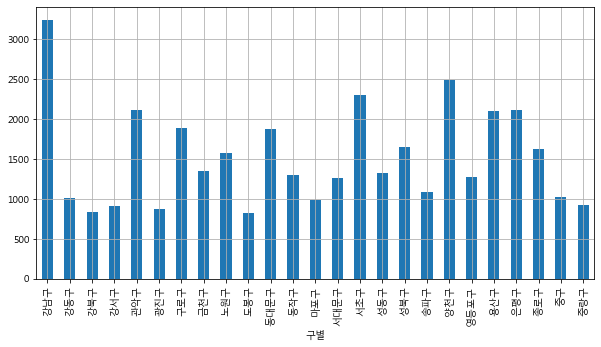

In [94]:
# CCTV가 많이 설치된 구별로 그래프 그리기

data_result["소계"].plot(kind="bar")
data_result["소계"].plot(kind="bar", figsize=(10, 5), grid=True) 
  # figsize:그래프 크기 조절 # grid:선그어주기 


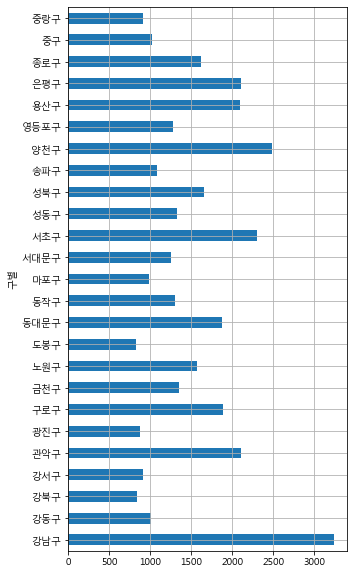

In [102]:
data_result["소계"].plot(kind="barh", figsize=(5, 10), grid=True) # 글자 회전시켜주기

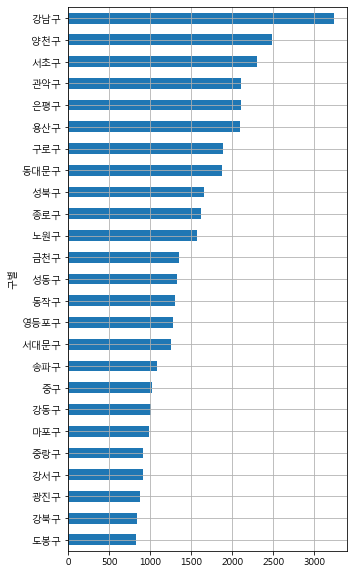

In [103]:
data_result["소계"].sort_values().plot(kind="barh", figsize=(5, 10), grid=True) # 그래프 정렬 시키기

In [105]:
# CCTV 비율 컬럼 추가(소계/인구수 *100)

data_result["CCTV 비율"]=(data_result["소계"]/data_result["인구수"]*100).round(2)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율
구별,,,,,,,,,
강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81,0.58
강동구,1010,166.49,438225,434027,4198,56983,0.96,13.00,0.23
강북구,831,125.20,327511,323862,3649,57002,1.11,17.40,0.25
강서구,911,134.79,608361,601696,6665,77381,1.10,12.72,0.15
관악구,2109,149.29,522292,504445,17847,70807,3.42,13.56,0.40


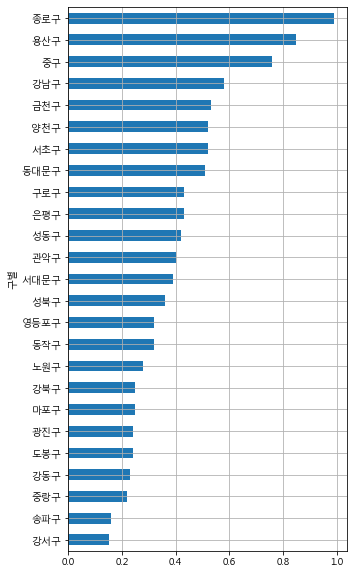

In [106]:
data_result["CCTV 비율"].sort_values().plot(kind="barh", figsize=(5, 10), grid=True) 

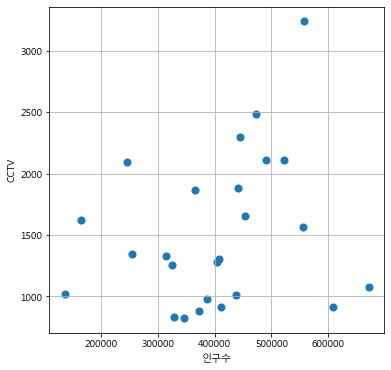

In [108]:
# CCTV의 설치대수와 인구수의 관계를 산포도로 확인

plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [109]:
# 회귀분석 : 데이터의 경향을 알 수 있음
# y = ax+b
# a : 가중치(w) 
# 최소제곱법 : 실제 데이터와 회귀선과의 거리를 계산한 값

In [114]:
# poly1d : 방정식 만들어주는 함수
a = np.poly1d([1, 2])   # 1차 
print(a)

print("-------------")

b = np.poly1d([1, 2, 3]) # 2차
print(b)

 
1 x + 2
-------------
   2
1 x + 2 x + 3


[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


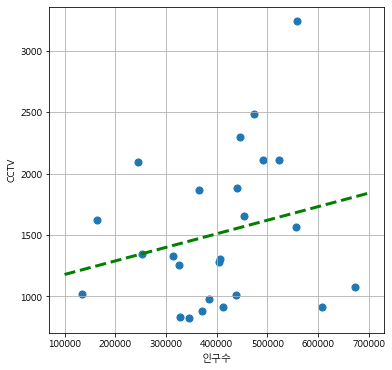

In [124]:
# 회귀선 작성(y = ax + b)
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)  # 최적의 가중치 값을 찾아주는 함수 # 1 : 1차원에 해당하는 값을 원한다
print(fp1)  # [기울기a, 절편b] 알려줌

f1 = np.poly1d(fp1)
print(f1)

fx = np.linspace(100000, 700000, 100)   # 최소, 최대, 눈금간격

plt.figure(figsize=(6, 6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed") 
                # 선추가 # f1(fx) : 실제 기울기를 통해 선이 어떤 위치에 그려지는지 나타내기 # lw 선의 두께, color 색깔, ls 선의 모양
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [132]:
# 각 데이터의 오차를 구해서 구 이름을 출력
data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"])) # abs : 절대값, 음의 값도 있기때문에
data_result.head()

df_sort = data_result.sort_values(by="오차", ascending=False) # 정렬
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.62,557865,552976,4889,65859,0.88,11.81,0.58,1553.296412
양천구,2482,34.67,473087,469221,3866,56070,0.82,11.85,0.52,890.918761
강서구,911,134.79,608361,601696,6665,77381,1.10,12.72,0.15,829.467513
용산구,2096,53.22,245411,229909,15502,37238,6.32,15.17,0.85,756.346747
서초구,2297,63.37,445164,440954,4210,54055,0.95,12.14,0.52,736.754790
송파구,1081,104.35,671994,665282,6712,77978,1.00,11.60,0.16,729.738939
도봉구,825,246.64,345041,342861,2180,54293,0.63,15.74,0.24,624.677016
중랑구,916,79.96,411552,406868,4684,59992,1.14,14.58,0.22,607.126685
광진구,878,53.23,371671,357149,14522,44470,3.91,11.96,0.24,601.085154


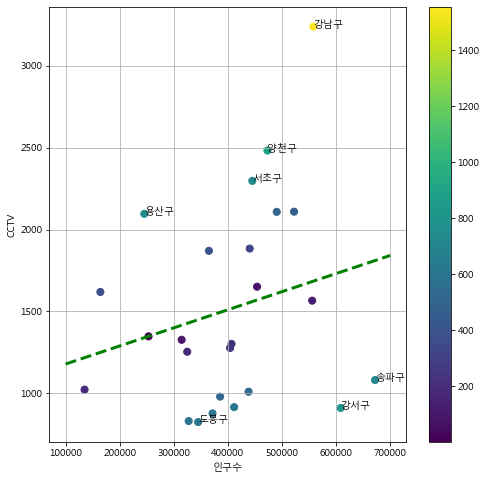

In [137]:
plt.figure(figsize=(8, 8))
plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"]) # 오차에 따라 색을 다르게 표현하기
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed") 
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar() # 어떤 색상이 오차가 크고 작은것인지 알수있음

for n in range(7): # 구 이름 출력
    plt.text(df_sort["인구수"][n], df_sort["소계"][n], df_sort.index[n], fontsize=10)   # 그래프에 글자 나타내주는 함수

In [138]:
# 최종 결과물을 저장

df_sort.to_csv("data/seoul/cctv_result.csv", sep=",", encoding="utf-8")